<a href="https://colab.research.google.com/github/flybiubiu/cs231n/blob/master/FullyConnectedNetsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Halfish/cs231n.git
%cd cs231n/assignment2
!pip install imageio
%cd cs231n/datasets/
!/content/cs231n/assignment2/cs231n/datasets/get_datasets.sh
%cd '/content/cs231n/assignment2'

Cloning into 'cs231n'...
remote: Enumerating objects: 191, done.
remote: Total 191 (delta 0), reused 0 (delta 0), pack-reused 191
Receiving objects: 100% (191/191), 8.21 MiB | 30.25 MiB/s, done.
Resolving deltas: 100% (66/66), done.
/content/cs231n/assignment2
/content/cs231n/assignment2/cs231n/datasets
--2019-11-22 13:10:31--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  28.2MB/s    in 6.4s    

2019-11-22 13:10:37 (25.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batche

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [3]:
data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s,' % k, v.shape

X_val, (1000, 3, 32, 32)
X_train, (49000, 3, 32, 32)
X_test, (1000, 3, 32, 32)
y_val, (1000,)
y_train, (49000,)
y_test, (1000,)


In [4]:
num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)
out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])
print 'Testing affine_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing affine_forward function:
difference:  9.769849468192957e-10


In [5]:
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)
dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)
_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)
print dx.shape
dx = dx.reshape(10, 2, 3)
print 'Testing affine_backward function:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

(10, 2, 3)
Testing affine_backward function:
dx error:  1.9789975252323498e-10
dw error:  9.316498937263898e-11
db error:  2.0701521945654208e-11


In [6]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)
out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])
print 'Testing relu_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing relu_forward function:
difference:  4.999999798022158e-08


In [7]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)
print 'Testing relu_backward function:'
print 'dx error: ', rel_error(dx_num, dx)

Testing relu_backward function:
dx error:  3.275620796525995e-12


In [8]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print 'Testing affine_relu_forward:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

Testing affine_relu_forward:
dx error:  9.39871998317403e-11
dw error:  3.81023871343135e-10
db error:  7.826640934985494e-12


In [10]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

print 'Testing svm_loss:'
print 'loss: ', loss
print 'dx error: ', rel_error(dx_num, dx)
dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

print '\nTesting softmax_loss:'
print 'loss: ', loss
print 'dx error: ', rel_error(dx_num, dx)

Testing svm_loss:
loss:  9.00073088729884
dx error:  1.4021566006651672e-09

Testing softmax_loss:
loss:  2.3026586552209283
dx error:  7.565855711225506e-09


In [16]:
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size = N)
std = 1e-2
model = TwoLayerNet(input_dim = D, hidden_dim=H, num_classes=C, weight_scale=std)
print 'Testing initialization ... '
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'
print 'Testing test-time forward pass ... '
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print 'Testing training loss (no regularization)'
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
  print 'Running numeric gradient check with reg = ', reg
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print '%s relative error: %.2e' % (name, rel_error(grad_num, grads[name]))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
W1 relative error: 1.83e-08
W2 relative error: 3.20e-10
b1 relative error: 9.83e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.56e-08
b2 relative error: 9.09e-10


In [17]:
model = TwoLayerNet()
solver = None
pass
solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                    'learning_rate': 1e-3,
                    },
                    lr_decay=0.95,
                    num_epochs=10, batch_size=100,
                    print_every=100)
solver.train()

(Iteration 1 / 4900) loss: 2.302077
(Epoch 0 / 10) train acc: 0.139000; val_acc: 0.153000
(Iteration 101 / 4900) loss: 1.928949
(Iteration 201 / 4900) loss: 1.536827
(Iteration 301 / 4900) loss: 1.454835
(Iteration 401 / 4900) loss: 1.572906
(Epoch 1 / 10) train acc: 0.478000; val_acc: 0.445000
(Iteration 501 / 4900) loss: 1.621531
(Iteration 601 / 4900) loss: 1.608656
(Iteration 701 / 4900) loss: 1.466693
(Iteration 801 / 4900) loss: 1.473414
(Iteration 901 / 4900) loss: 1.449815
(Epoch 2 / 10) train acc: 0.455000; val_acc: 0.450000
(Iteration 1001 / 4900) loss: 1.513910
(Iteration 1101 / 4900) loss: 1.252053
(Iteration 1201 / 4900) loss: 1.330753
(Iteration 1301 / 4900) loss: 1.365213
(Iteration 1401 / 4900) loss: 1.459948
(Epoch 3 / 10) train acc: 0.535000; val_acc: 0.482000
(Iteration 1501 / 4900) loss: 1.421630
(Iteration 1601 / 4900) loss: 1.370751
(Iteration 1701 / 4900) loss: 1.377809
(Iteration 1801 / 4900) loss: 1.475509
(Iteration 1901 / 4900) loss: 1.431100
(Epoch 4 / 10) t

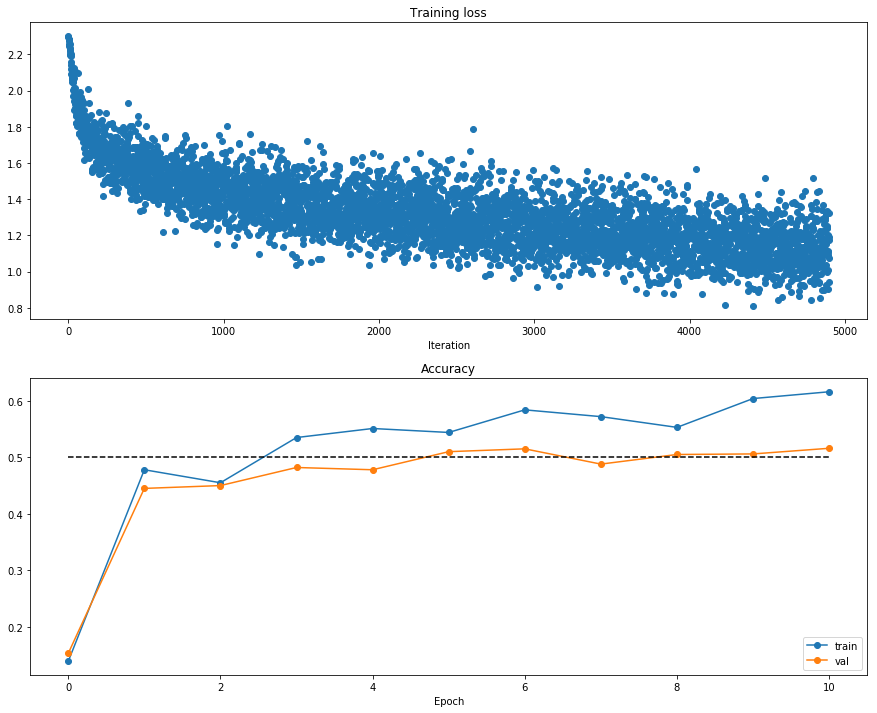

In [18]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [21]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)
for reg in [0, 3.14]:
  print 'Running check with reg = ', reg
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)
  loss, grads = model.loss(X, y)
  print 'Initial loss: ', loss
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
    print '%s relative error: %.2e' % (name, rel_error(grad_num, grads[name]))

Running check with reg =  0
Initial loss:  2.3060486651814553
W1 relative error: 3.75e-07
W2 relative error: 4.26e-08
W3 relative error: 2.49e-07
b1 relative error: 1.30e-09
b2 relative error: 8.82e-10
b3 relative error: 5.38e-10
Running check with reg =  3.14
Initial loss:  463.0407414421238
W1 relative error: 6.99e-07
W2 relative error: 5.91e-06
W3 relative error: 2.76e-08
b1 relative error: 1.66e-07
b2 relative error: 8.51e-09
b3 relative error: 2.73e-08


(Iteration 1 / 40) loss: 40.768973
(Epoch 0 / 20) train acc: 0.140000; val_acc: 0.112000
(Epoch 1 / 20) train acc: 0.400000; val_acc: 0.164000
(Epoch 2 / 20) train acc: 0.580000; val_acc: 0.165000
(Epoch 3 / 20) train acc: 0.720000; val_acc: 0.161000
(Epoch 4 / 20) train acc: 0.740000; val_acc: 0.160000
(Epoch 5 / 20) train acc: 0.860000; val_acc: 0.165000
(Iteration 11 / 40) loss: 0.811203
(Epoch 6 / 20) train acc: 0.880000; val_acc: 0.184000
(Epoch 7 / 20) train acc: 0.960000; val_acc: 0.186000
(Epoch 8 / 20) train acc: 1.000000; val_acc: 0.185000
(Epoch 9 / 20) train acc: 1.000000; val_acc: 0.179000
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.179000
(Iteration 21 / 40) loss: 0.002913
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.179000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.179000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.179000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.179000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.179000
(Iteration 31 / 40) loss:

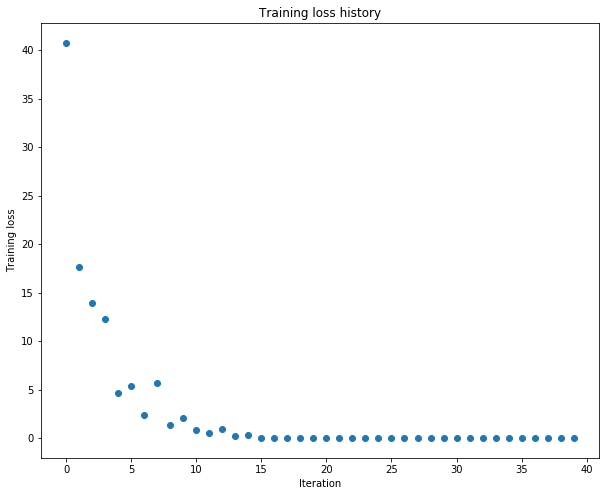

In [23]:
num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
weight_scale = 1e-2
learning_rate = 1e-4
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

(Iteration 1 / 40) loss: 8.555337
(Epoch 0 / 20) train acc: 0.280000; val_acc: 0.119000
(Epoch 1 / 20) train acc: 0.240000; val_acc: 0.145000
(Epoch 2 / 20) train acc: 0.500000; val_acc: 0.125000
(Epoch 3 / 20) train acc: 0.800000; val_acc: 0.127000
(Epoch 4 / 20) train acc: 0.820000; val_acc: 0.118000
(Epoch 5 / 20) train acc: 0.920000; val_acc: 0.132000
(Iteration 11 / 40) loss: 0.142606
(Epoch 6 / 20) train acc: 0.960000; val_acc: 0.125000
(Epoch 7 / 20) train acc: 0.960000; val_acc: 0.133000
(Epoch 8 / 20) train acc: 0.980000; val_acc: 0.127000
(Epoch 9 / 20) train acc: 0.980000; val_acc: 0.128000
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.131000
(Iteration 21 / 40) loss: 0.055605
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.127000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.127000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.127000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.129000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.132000
(Iteration 31 / 40) loss: 

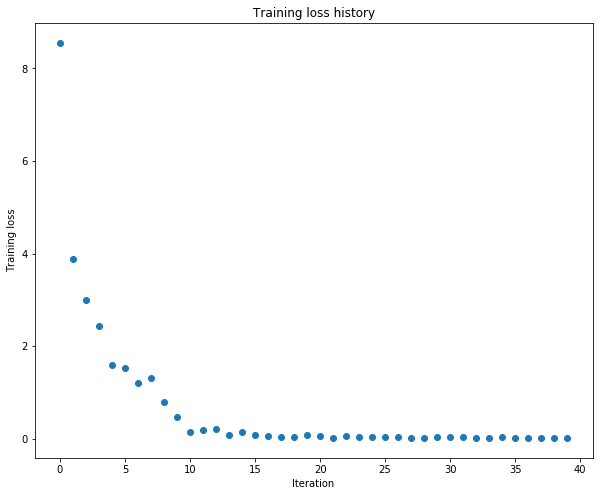

In [24]:
num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
learning_rate = 1e-3
weight_scale = 3e-2
model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()
plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

In [25]:
from cs231n.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)
expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print 'next_w error: ', rel_error(next_w, expected_next_w)
print 'velocity error: ', rel_error(expected_velocity, config['velocity'])

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


running with  sgd
(Iteration 1 / 200) loss: inf
(Epoch 0 / 5) train acc: 0.110000; val_acc: 0.130000
(Iteration 11 / 200) loss: 4.601046
(Iteration 21 / 200) loss: 3.211687
(Iteration 31 / 200) loss: 2.727045
(Epoch 1 / 5) train acc: 0.213000; val_acc: 0.146000
(Iteration 41 / 200) loss: 3.048174
(Iteration 51 / 200) loss: 2.554788
(Iteration 61 / 200) loss: 2.647431
(Iteration 71 / 200) loss: 2.324007
(Epoch 2 / 5) train acc: 0.262000; val_acc: 0.173000
(Iteration 81 / 200) loss: 2.404926
(Iteration 91 / 200) loss: 2.223152
(Iteration 101 / 200) loss: 2.255100
(Iteration 111 / 200) loss: 2.371317
(Epoch 3 / 5) train acc: 0.305000; val_acc: 0.181000
(Iteration 121 / 200) loss: 2.104954
(Iteration 131 / 200) loss: 2.210183
(Iteration 141 / 200) loss: 2.102290
(Iteration 151 / 200) loss: 2.019763
(Epoch 4 / 5) train acc: 0.335000; val_acc: 0.195000
(Iteration 161 / 200) loss: 2.213374
(Iteration 171 / 200) loss: 2.115569
(Iteration 181 / 200) loss: 1.944754
(Iteration 191 / 200) loss: 1.

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


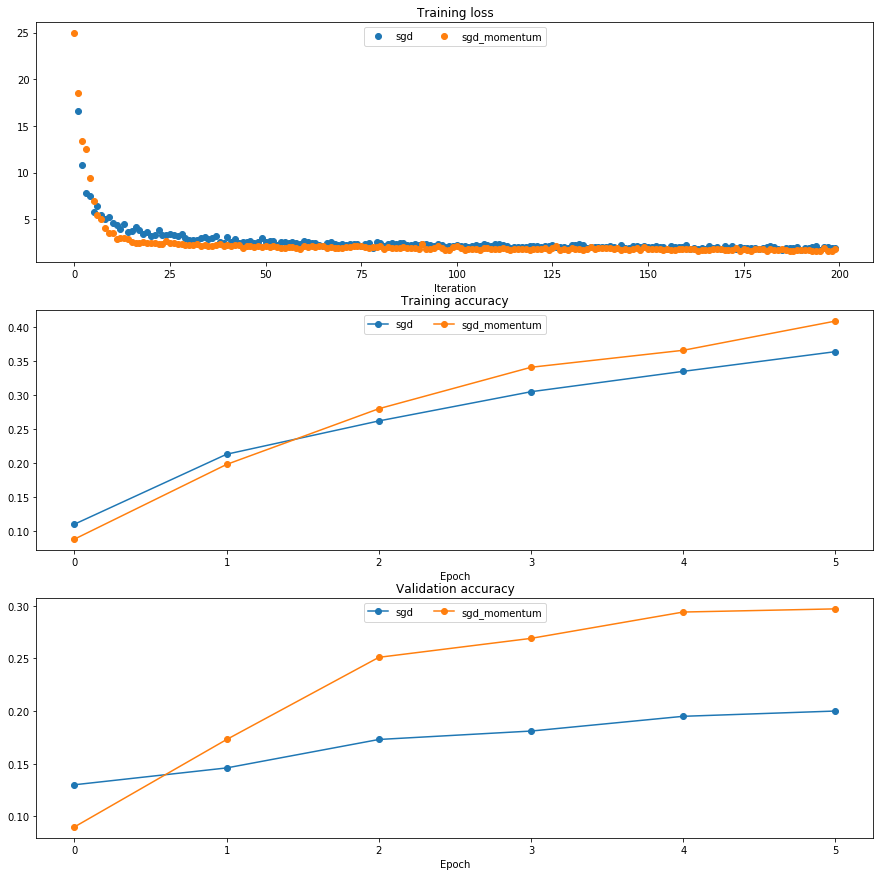

In [27]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
  print 'running with ', update_rule
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-3,
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [28]:
from cs231n.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print 'next_w error: ', rel_error(expected_next_w, next_w)
print 'cache error: ', rel_error(expected_cache, config['cache'])

next_w error:  9.524687511038133e-08
cache error:  2.6477955807156126e-09


In [29]:
from cs231n.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print 'next_w error: ', rel_error(expected_next_w, next_w)
print 'v error: ', rel_error(expected_v, config['v'])
print 'm error: ', rel_error(expected_m, config['m'])

next_w error:  0.20720703668629928
v error:  4.208314038113071e-09
m error:  4.214963193114416e-09


running with  adam
(Iteration 1 / 200) loss: 17.887844
(Epoch 0 / 5) train acc: 0.108000; val_acc: 0.097000
(Iteration 11 / 200) loss: 5.095452
(Iteration 21 / 200) loss: 2.785068
(Iteration 31 / 200) loss: 2.415349
(Epoch 1 / 5) train acc: 0.196000; val_acc: 0.181000
(Iteration 41 / 200) loss: 2.225744
(Iteration 51 / 200) loss: 2.222430
(Iteration 61 / 200) loss: 2.175028
(Iteration 71 / 200) loss: 2.430568
(Epoch 2 / 5) train acc: 0.247000; val_acc: 0.242000
(Iteration 81 / 200) loss: 2.190579
(Iteration 91 / 200) loss: 2.188325
(Iteration 101 / 200) loss: 1.902528
(Iteration 111 / 200) loss: 2.180536
(Epoch 3 / 5) train acc: 0.303000; val_acc: 0.254000
(Iteration 121 / 200) loss: 1.770875
(Iteration 131 / 200) loss: 1.853430
(Iteration 141 / 200) loss: 1.844057
(Iteration 151 / 200) loss: 2.065491
(Epoch 4 / 5) train acc: 0.325000; val_acc: 0.257000
(Iteration 161 / 200) loss: 1.813608
(Iteration 171 / 200) loss: 1.916194
(Iteration 181 / 200) loss: 1.835502
(Iteration 191 / 200) l

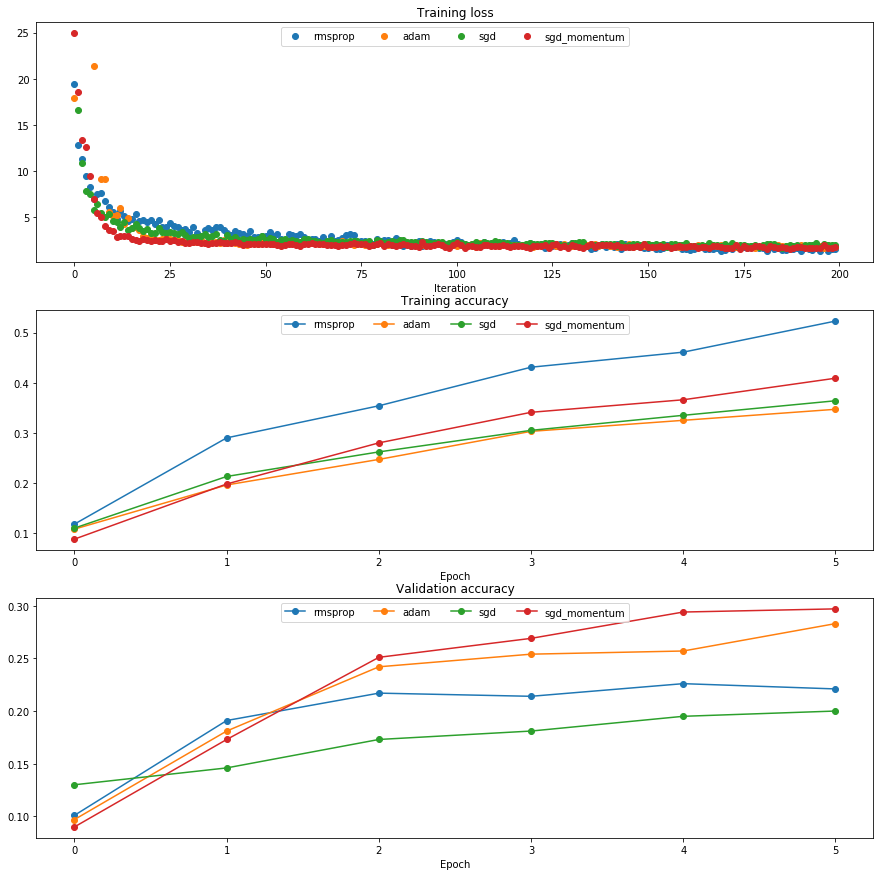

In [32]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
  print 'running with ', update_rule
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [33]:
best_model = None
pass
best_acc = 0
for learning_rate in [1e-3, 1e-4]:
    for reg in [1e-2, 1e-3, 1e-4]:
        model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2, reg = reg)

        solver = Solver(model, data,
                      num_epochs=10, batch_size=200,
                      update_rule='rmsprop',
                      optim_config={
                        'learning_rate': learning_rate
                      },
                      verbose=False)
        solver.train()
        print 'learning_rate = %f, reg = %f, best val loss = %f' %(learning_rate, reg, solver.best_val_acc)
        if solver.best_val_acc > best_acc:
            best_acc = solver.best_val_acc
            best_model = model

learning_rate = 0.001000, reg = 0.010000, best val loss = 0.469000
learning_rate = 0.001000, reg = 0.001000, best val loss = 0.497000
learning_rate = 0.001000, reg = 0.000100, best val loss = 0.498000
learning_rate = 0.000100, reg = 0.010000, best val loss = 0.428000
learning_rate = 0.000100, reg = 0.001000, best val loss = 0.420000
learning_rate = 0.000100, reg = 0.000100, best val loss = 0.448000


In [34]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()

Validation set accuracy:  0.498
Test set accuracy:  0.482
